<H1> Transfer Learning </H1>
To apply transfer learning using ResNet50 to train on the CIFAR-10 dataset, you need to adjust the model to accept the input size of the CIFAR-10 images and modify the output layer to have 10 classes.

Here’s how you can do it:

Load and preprocess the CIFAR-10 data.
Convert images to the required size and format.
Load the pre-trained ResNet50 model without the top layer.
Add custom layers on top of the ResNet50 base model.
Compile and train the model.

<H1> Import Libraries </H1>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, VGG19, VGG16, MobileNetV2, EfficientNetB0, DenseNet121
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
# visuals
import matplotlib.pyplot as plt

<H1> Load and preprocess the CIFAR-10 data. </H1>

Data Preparation:

The CIFAR-10 dataset is loaded and resized to 224x224 pixels as required by ResNet50.
The images are normalized to the range [0, 1], and the labels are one-hot encoded.

In [2]:
BATCH_SIZE = 64
EPOCHS = 100

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # Resize images to 224x224 as required by ResNet50
# X_train = tf.image.resize(X_train, (224, 224))
# X_test = tf.image.resize(X_test, (224, 224))

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Data Augementation
datagen = ImageDataGenerator(rotation_range=20,
                             horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2
                            )
train_gen = datagen.flow(X_train,y_train,batch_size=BATCH_SIZE)

<H1> Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer </H1>

The pre-trained ResNet50 model is loaded without its top layer (include_top=False).
Custom layers are added on top of the ResNet50 base model, including a global average pooling layer, a dense layer with 128 units and ReLU activation, and a final dense layer with 10 units and softmax activation for classification.

In [5]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32, 3)))

<H1> Add custom layers on top of the base model </H1>

In [6]:
# Freeze the base model to prevent its weights from being updated during training.
base_model.trainable = False

In [7]:
#Lets add the final layers to these base models where the actual classification is done in the dense layers
model_1= models.Sequential()
model_1.add(base_model) #Adds the base model (in this case vgg19 to model_1)
model_1.add(layers.Flatten()) #Since the output before the flatten layer is a matrix we have to use this function to get a vector of the form nX1 to feed it into the fully connected layers
#Add the Dense layers along with activation and batch normalization
# model_1.add(layers.Dense(1024,activation=('relu'),input_dim=512))
# model_1.add(layers.Dense(512,activation=('relu'))) 
# model_1.add(layers.Dense(256,activation=('relu'))) 
# model_1.add(layers.Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(layers.Dense(128,activation=('relu')))
# model_1.add(layers.Dropout(.2))
model_1.add(layers.Dense(10,activation=('softmax'))) #This is the classification layer

In [8]:

model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
hist_train = model_1.fit(X_train, y_train, 
                        validation_data=(X_test, y_test), #train, y_train), 
                        epochs=EPOCHS, 
                        )

Epoch 1/100
1563/1563 [==============================] - 41s 21ms/step - loss: 1.2269 - accuracy: 0.5714 - val_loss: 1.1200 - val_accuracy: 0.6063
Epoch 2/100
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0389 - accuracy: 0.6322 - val_loss: 1.0691 - val_accuracy: 0.6318
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9698 - accuracy: 0.6588 - val_loss: 1.0291 - val_accuracy: 0.6432
Epoch 4/100
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9172 - accuracy: 0.6762 - val_loss: 1.0308 - val_accuracy: 0.6416
Epoch 5/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8723 - accuracy: 0.6919 - val_loss: 1.0379 - val_accuracy: 0.6440
Epoch 6/100
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8323 - accuracy: 0.7044 - val_loss: 1.0391 - val_accuracy: 0.6446
Epoch 7/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7964 - accuracy: 0.7177 - val_loss: 1

KeyboardInterrupt: 

In [17]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

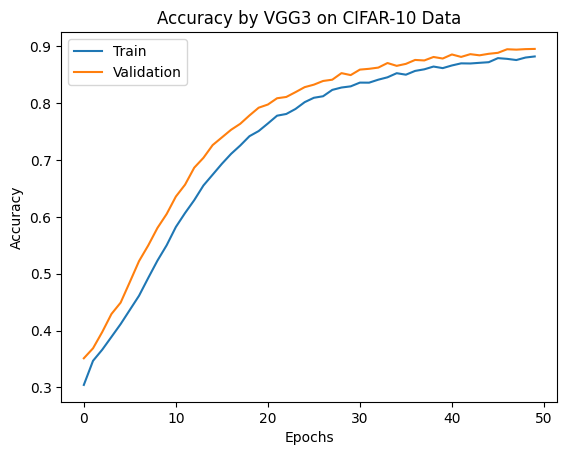

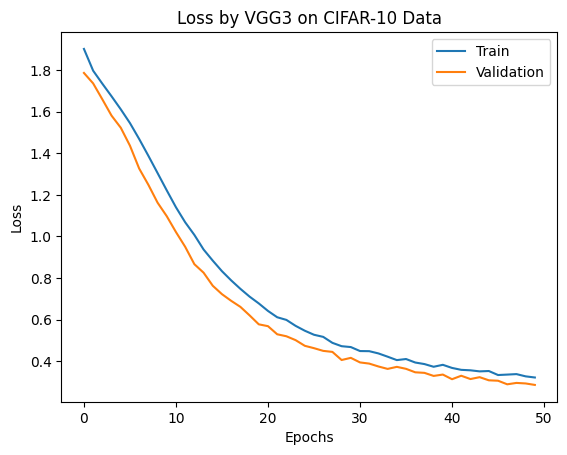

In [18]:
myplot(hist_train)

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 7.5745 - accuracy: 0.3101


[7.5745415687561035, 0.3100999891757965]